In [2]:
#models = ['GIN', 'GAT', 'GCNN', 'GatedGCNN']
# note, no twitter.
#TUdataset_names = ["RANDOM",'ENZYMES', 'PROTEINS', 'IMDB-BINARY', 'MUTAG', 'COLLAB']
prefixes = ['230908_hparam_bigrandom', '230913_hparam_bigrandom_PE']
params = ['num_layers', 'TUdataset_name', 'vc_penalty', 'rank', 'positional_encoding']

In [7]:
import os
import json
import pandas as pd
import numpy as np

folder_path = '/home/bcjexu/maxcut-80/bespoke-gnn4do/training_runs'
model_list = [os.path.join(folder_path,x) for x in os.listdir(folder_path) for prefix in prefixes if x.startswith(prefix)]


rows = []
for model_folder in model_list:
    try:
        with open(os.path.join(model_folder, 'params.txt'), 'r') as f:
            model_args = json.load(f)
        
        losses = np.load(os.path.join(model_folder, 'valid_scores.npy'))
        modeldict = {x: model_args[x] for x in params}
        modeldict['full_scores'] = losses
        modeldict['scores'] = losses[-1]
        rows.append(modeldict)
        
    except:
        print(f'something is wrong w/ {model_folder}')

something is wrong w/ /home/bcjexu/maxcut-80/bespoke-gnn4do/training_runs/230908_hparam_bigrandom_paramhash:45d1e70b28315bcdae0633c7d4ca62eba2f0b723cd15210804d750f5471d4b9a
something is wrong w/ /home/bcjexu/maxcut-80/bespoke-gnn4do/training_runs/230908_hparam_bigrandom_paramhash:a74018ab7cab52050e4ea794c3540368f1ee93c2f4393fc6be425f10610fb0ff
something is wrong w/ /home/bcjexu/maxcut-80/bespoke-gnn4do/training_runs/230908_hparam_bigrandom_paramhash:df11b9eee0627d01ad6e20e5bd4622e8ce5d225bcb0abfab14a0c7a3ef6abf74
something is wrong w/ /home/bcjexu/maxcut-80/bespoke-gnn4do/training_runs/230908_hparam_bigrandom_paramhash:26f4d18e060aab4bf9463bda035e1552d42b15e9c1570f2f5b8c8325aaf68de6
something is wrong w/ /home/bcjexu/maxcut-80/bespoke-gnn4do/training_runs/230908_hparam_bigrandom_paramhash:7c3ae7d4c87bc56d8cc26d8ad751822af793334ed2819c4943afe1c864885f16
something is wrong w/ /home/bcjexu/maxcut-80/bespoke-gnn4do/training_runs/230908_hparam_bigrandom_paramhash:9417ace0576693285be3e1d5f77

In [8]:
#rows.append({'TUdataset_name': 'Dummy',
#             'scores': 0})

In [9]:
df = pd.DataFrame.from_records(rows)

In [10]:
df = df.fillna("None")

In [11]:
df.sort_values('scores', ascending = False)

,num_layers,TUdataset_name,vc_penalty,rank,positional_encoding,full_scores,scores
29,10,RANDOM,1.0,16,laplacian_eigenvector,"[-499.495, -499.655, -499.56, -499.665, -499.6...",-468.310
0,10,RANDOM,1.0,8,laplacian_eigenvector,"[-499.595, -499.45, -499.55, -499.645, -499.49...",-468.515
5,12,RANDOM,1.0,8,laplacian_eigenvector,"[-499.845, -499.695, -499.82, -499.83, -499.79...",-468.930
16,10,RANDOM,1.0,8,None,"[-499.595, -499.52, -499.5, -499.565, -499.395...",-469.515
24,12,RANDOM,1.0,8,None,"[-499.89, -499.81, -499.87, -499.76, -499.825,...",-471.260
14,6,RANDOM,1.0,8,None,"[-497.49, -497.315, -497.33, -497.105, -497.29...",-471.795
6,6,RANDOM,1.0,8,laplacian_eigenvector,"[-497.365, -497.435, -497.23, -497.25, -497.60...",-472.230
4,6,RANDOM,1.0,4,laplacian_eigenvector,"[-495.58, -495.61, -495.715, -495.56, -495.57,...",-476.290
15,6,RANDOM,1.0,4,None,"[-495.88, -496.18, -496.23, -496.515, -496.33,...",-476.940
17,10,RANDOM,1.0,16,None,"[-499.755, -499.74, -499.755, -499.8, -499.815...",-478.795


Text(0.5, 0, '100-step increments')

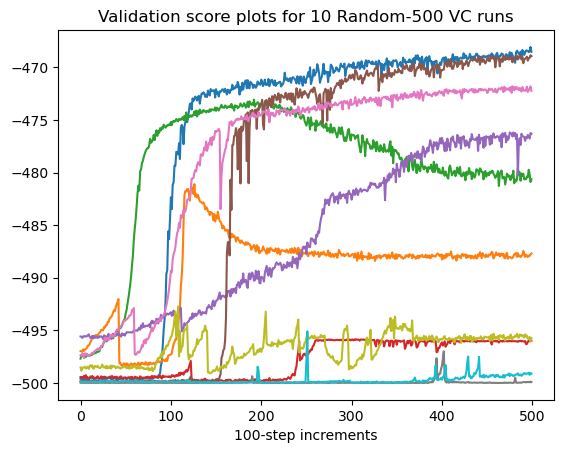

In [17]:
import matplotlib.pyplot as plt

for i, row in df.head(10).iterrows():
    plt.plot(row.full_scores)

plt.title("Validation score plots for 10 Random-500 VC runs")
plt.xlabel("100-step increments")

In [11]:
import seaborn as sns

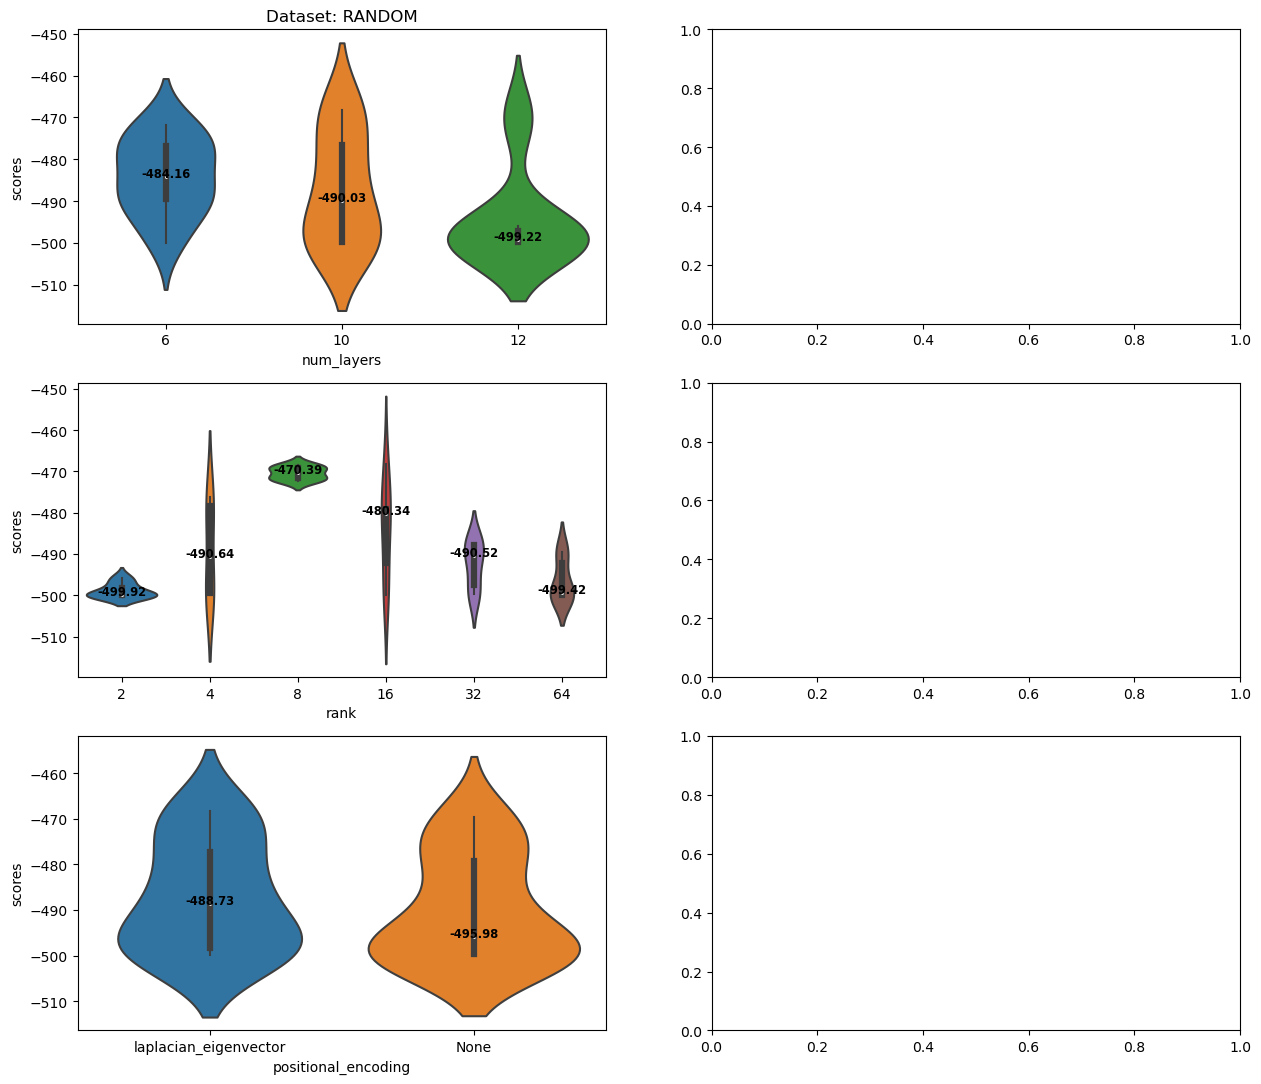

In [16]:
# hparams in rows
# datasets in colums
rows = [x for x in params if x not in ["TUdataset_name", 'vc_penalty']]
columns = {'RANDOM', 'Dummy'} #set(df.TUdataset_name).union(set("Dummy"))
import matplotlib.pyplot as plt

fig, axs= plt.subplots(nrows=len(rows), ncols=len(columns), figsize=(15, 13))

for i, x in enumerate(columns):
    dfx = df[df.TUdataset_name == x]
    if len(dfx) == 0: continue
    for j, y_name in enumerate(rows):
        ax = axs[j][i]
        x_vals = dfx[y_name]
        y_vals = dfx['scores']

        sns.violinplot(x=x_vals, y=y_vals, ax=ax)
        medians = dfx.groupby([y_name])['scores'].median()#
        try:
            median_dict = dict(zip([f'{float(x):0.2f}' for x in medians.keys()], medians.values))
        except:
            median_dict = dict(zip([x for x in medians.keys()], medians.values))
        pos = range(len(medians))
        for tick, label in enumerate(ax.get_xticklabels()):
            try:
                label = f'{float(label.get_text()):0.2f}'
            except:
                label = label.get_text()
            #print(median_dict)
            #if median_dict.get(label, None) is not None:
            ax.text(pos[tick], median_dict[label] + 0.01, f'{median_dict[label]:0.2f}',
                        horizontalalignment='center',
                        size='small',
                        color='k',
                        weight='semibold')
    
        if j == 0:
            ax.set(title=f"Dataset: {x}")

plt.show()

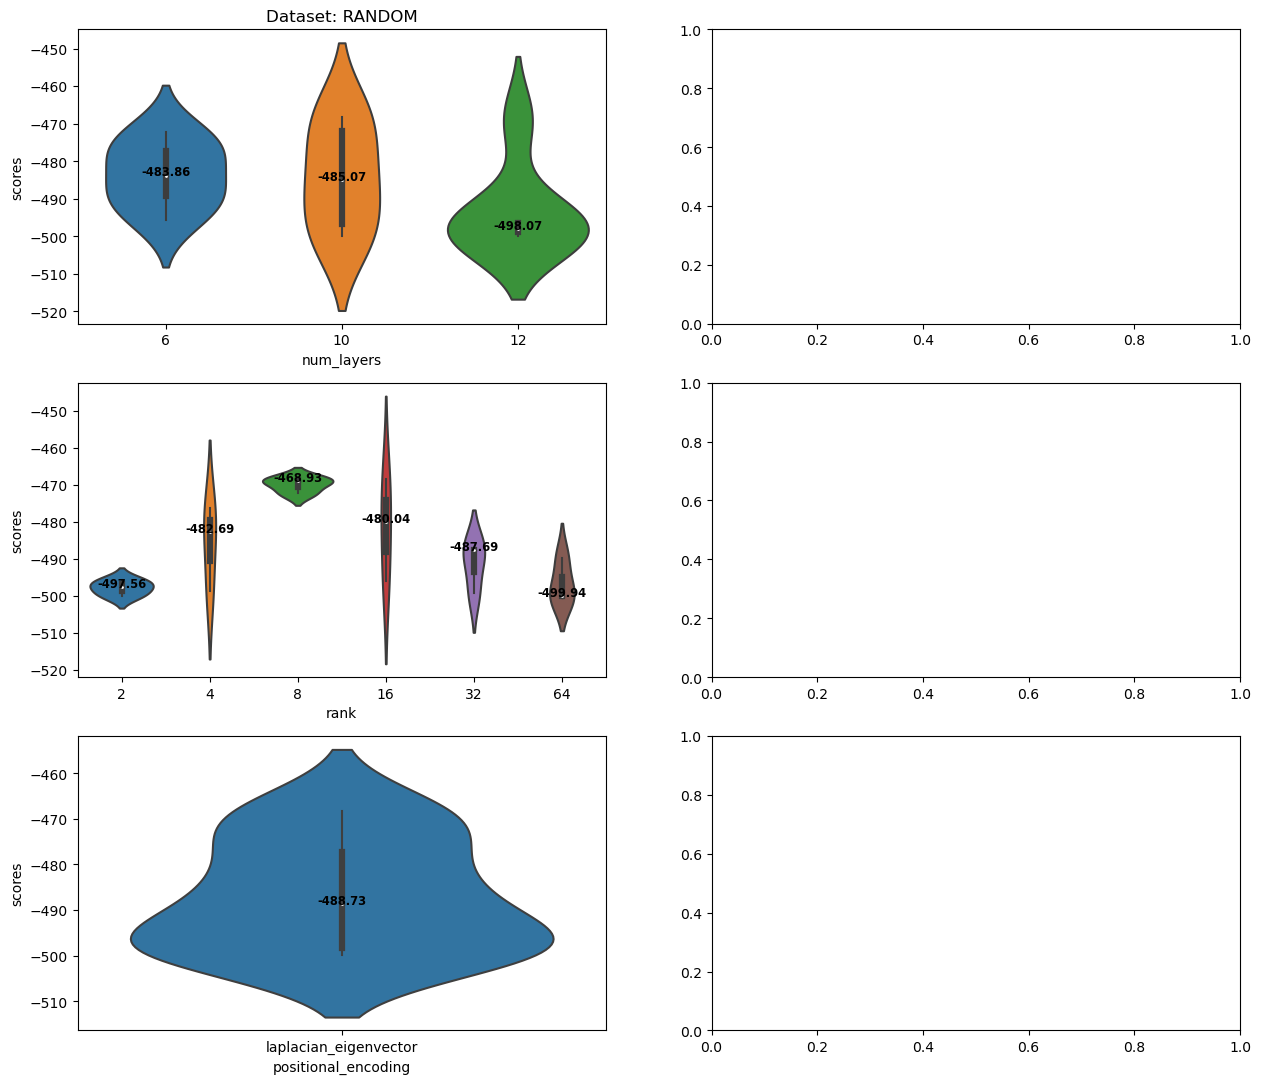

In [19]:
# hparams in rows
# datasets in colums
rows = [x for x in params if x not in ["TUdataset_name", 'vc_penalty']]
columns = {'RANDOM', 'Dummy'} #set(df.TUdataset_name).union(set("Dummy"))
import matplotlib.pyplot as plt

fig, axs= plt.subplots(nrows=len(rows), ncols=len(columns), figsize=(15, 13))

for i, x in enumerate(columns):
    dfx = df[(df.TUdataset_name == x)& (df.positional_encoding != "None")]
    if len(dfx) == 0: continue
    for j, y_name in enumerate(rows):
        ax = axs[j][i]
        x_vals = dfx[y_name]
        y_vals = dfx['scores']

        sns.violinplot(x=x_vals, y=y_vals, ax=ax)
        medians = dfx.groupby([y_name])['scores'].median()#
        try:
            median_dict = dict(zip([f'{float(x):0.2f}' for x in medians.keys()], medians.values))
        except:
            median_dict = dict(zip([x for x in medians.keys()], medians.values))
        pos = range(len(medians))
        for tick, label in enumerate(ax.get_xticklabels()):
            try:
                label = f'{float(label.get_text()):0.2f}'
            except:
                label = label.get_text()
            #print(median_dict)
            #if median_dict.get(label, None) is not None:
            ax.text(pos[tick], median_dict[label] + 0.01, f'{median_dict[label]:0.2f}',
                        horizontalalignment='center',
                        size='small',
                        color='k',
                        weight='semibold')
    
        if j == 0:
            ax.set(title=f"Dataset: {x}")

plt.show()